<a href="https://colab.research.google.com/github/Adhira-Deogade/my-second-repo/blob/master/Adhira_Deogade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name: Adhira Deogade**
# **Email: deogade.a@husky.neu.edu**

**Import libraries**

In [0]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import matthews_corrcoef


**Upload CSV file**

In [0]:
up = files.upload()

In [0]:
pwd

In [0]:
ls

**Rename file using shell script**

In [0]:
mv screening_exercise_orders_v201810.csv assn.csv

In [0]:
ls

**Import dataset into pandas dataframe object**

In [0]:
df = pd.read_csv("assn.csv")

**Look into the dataset**

In [3]:
df.head()

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.5,1
1,1001,0,2017-01-01 00:29:56,338.0,1
2,1002,1,2017-01-01 01:30:31,733.0,1
3,1003,1,2017-01-01 01:34:22,772.0,1
4,1004,0,2017-01-01 03:11:54,508.0,1


In [8]:
df.dtypes

customer_id           int64
gender                int64
date                 object
value               float64
predicted_gender      int64
dtype: object

**Change date column to date time**

In [0]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df['date'].dtype

dtype('<M8[ns]')

# **A) Sort the dataframe by customer_id ascending and display the first 10 rows**

In [0]:
sorted_df = df.sort_values(by='customer_id',ascending=True)

In [12]:
sorted_df.head(10)

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.5,1
1,1001,0,2017-01-01 00:29:56,338.0,1
2,1002,1,2017-01-01 01:30:31,733.0,1
1742,1002,1,2017-02-19 21:35:31,176.0,1
928,1002,1,2017-01-23 04:33:38,148.6,1
3,1003,1,2017-01-01 01:34:22,772.0,1
676,1003,1,2017-01-20 05:56:10,425.5,1
4292,1003,1,2017-04-25 09:54:54,0.0,1
4323,1003,1,2017-04-26 02:37:20,704.0,1
4,1004,0,2017-01-01 03:11:54,508.0,1


# **B) Plot the count of orders per week for the store**

In [0]:
## Obtain week number
df['Week_Number'] = df['date'].dt.week

In [14]:
df.head()

,customer_id,gender,date,value,predicted_gender,Week_Number
0,1000,0,2017-01-01 00:11:31,198.5,1,52
1,1001,0,2017-01-01 00:29:56,338.0,1,52
2,1002,1,2017-01-01 01:30:31,733.0,1,52
3,1003,1,2017-01-01 01:34:22,772.0,1,52
4,1004,0,2017-01-01 03:11:54,508.0,1,52


In [0]:
## Alternate method to create a pivot table with pandas
# table = pd.pivot_table(df, values='value',aggfunc='count',index='Week_Number')

In [0]:
resample_df = df.copy(deep=True)

In [0]:
resample_df['date'] = resample_df.date.dt.date

In [18]:
resample_df.head()

,customer_id,gender,date,value,predicted_gender,Week_Number
0,1000,0,2017-01-01,198.5,1,52
1,1001,0,2017-01-01,338.0,1,52
2,1002,1,2017-01-01,733.0,1,52
3,1003,1,2017-01-01,772.0,1,52
4,1004,0,2017-01-01,508.0,1,52


In [0]:
resample_df = df.resample('W', on='date').count()

In [20]:
resample_df.head()

,customer_id,gender,date,value,predicted_gender,Week_Number
date,,,,,,
2017-01-01,14,14,14,14,14,14
2017-01-08,180,180,180,180,180,180
2017-01-15,264,264,264,264,264,264
2017-01-22,405,405,405,405,405,405
2017-01-29,233,233,233,233,233,233


In [21]:
resample_df.index.dtype

dtype('<M8[ns]')

**Plot count of orders by week and save figure**

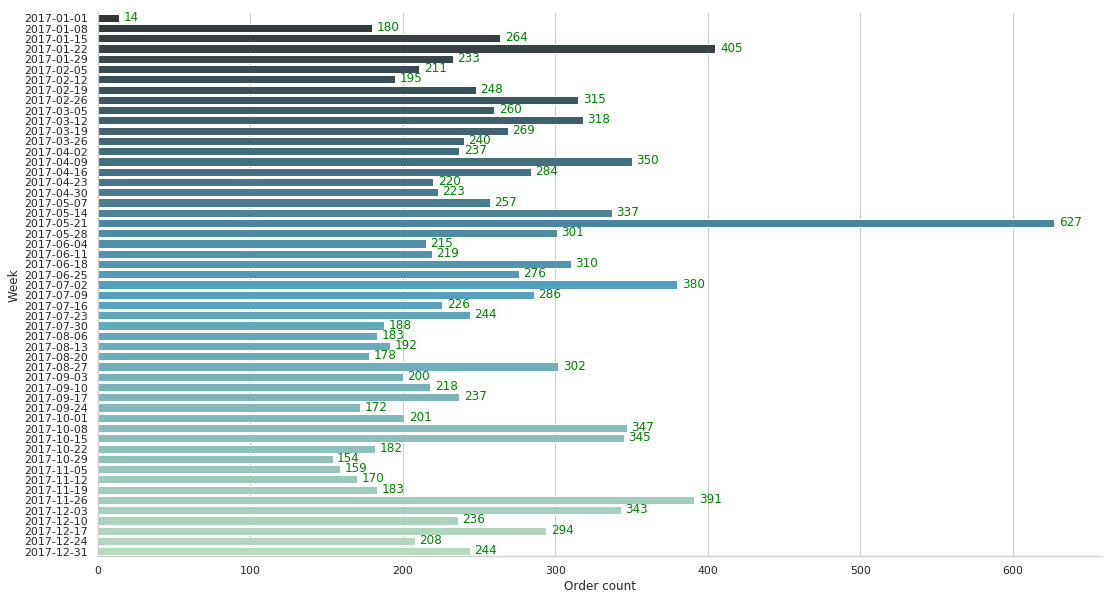

In [22]:
plt.figure(figsize=(18,10))
sns.set(font_scale=1)
sns.set_style("whitegrid")

g=sns.barplot(y=resample_df.index.date, x=resample_df.value, orient='h', palette="GnBu_d")
for i, v in enumerate(resample_df.value):
    g.text(v + 3, i + .25, str(v), color='green', fontweight='light')

g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)
g.set(xlabel='Order count', ylabel='Week')
plt.savefig("Order-Count.jpg")

**Download image file**

In [0]:
files.download("Order-Count.jpg")

# **C) Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant?**

In [24]:
df.gender.dtype

dtype('int64')

In [0]:
grouped = df.groupby(df["gender"]).mean()

In [26]:
grouped.value

gender
0    363.890006
1    350.708361
Name: value, dtype: float64

In [27]:
df.value.mean()

357.3221787543603


The difference of mean when gender is "0" and "1" comparing with the mean of all genders, tells us that:
1.   When gender is "0", average value is greater than average of total, and when gender is "1", average value is greater than average of total
2.   This tells us that, difference helps us distinguish values between two genders. 


# **D) Assuming a single gender prediction was made for each customer, generate a confusion matrix for predicted gender. What does the confusion matrix tell you about the quality of the predictions?**

In [28]:
pd.crosstab(df['gender'], df['predicted_gender'], rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,3349,3410,6759
1,1463,5249,6712
All,4812,8659,13471


In [30]:
## Sensitivity/ recall
s = 3349/6759
s*100

49.5487498150614

In [31]:
## Specificity
sp = 5249/6712
sp*100

78.20321811680571

In [32]:
## Precision
pr = 3349/4812
pr*100

69.5968412302577

In [33]:
## f-1 score
f1 = (2*pr*s)/(pr+s)
f1

0.578860945467116

In [34]:
matthews_corrcoef(df.gender, df.predicted_gender) 

0.2895771589836361



1.   Compare with -1 to +1, where +1 tells positive perfect classification
2. MCC value is close to 0, this tells us that, the model is no good than a random classification




# **E) Describe one of your favorite tools or techniques and give a small example of how it's helped you solve a problem. Limit your answer to one paragraph.**

 My favourite tool for forecasiting/ predcition problem is Seasonal Auto-Regressive Integrated Moving Average (SARIMA) time series method.
During my co-op I had to predict sales and acticipated customer support tickets for upcoming 6 months from their previous 4 years of data.
The company made large sales during summer and fewer during November and December months. Therefore, I felt the need to include the seasonal component in my averaging time-series model.
This helped me improve my predcitions and keep them under a confidence interval of +/- 8% which was otherwise 12% without seasonal component
I found it intriguing to tune the window size for my model and this way, I could achieve an optimum result.
My second favourite tool is Naive Bayes. I am using this approach for my research project to classify childeren into very-severe and non-severe pneumonia.
This approach is faster than Random Forest and Logistic regression and I am able to obtain and set posterior probabilities, this helped me improve my classification using different biomarkers



---



---

